In [1]:
import numpy as np

csv_path = "../mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [2]:
print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


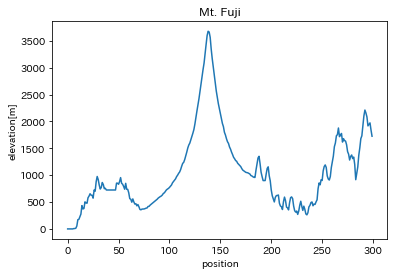

In [3]:
# 問題1
import matplotlib.pyplot as plt
import japanize_matplotlib

plt.title("Mt. Fuji")
plt.plot(fuji[:,0], fuji[:,3])
plt.xlabel('position')
plt.ylabel('elevation[m]')
plt.show()

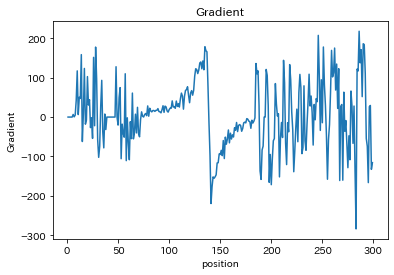

In [4]:
# 問題2
y = fuji[:,3]
x = fuji[:,0]
gradient = (y[1:] - y[:-1]) / (x[1:] - x[:-1])
plt.title("Gradient")
plt.plot(x[1:], gradient)
plt.xlabel('position')
plt.ylabel('Gradient')
plt.show()

[   0.       0.       0.       0.       0.      -1.324    6.502    6.212
    3.758   30.98   170.304  167.766  218.776  243.704  446.164  370.076
  355.392  507.002  486.904  457.284  574.416  602.112  660.308  628.536
  637.458  542.27   728.352  666.434  860.13   987.572  939.592  831.788
  737.488  752.292  871.568  842.146  746.846  762.432  724.5    724.5
  724.5    724.5    724.5    724.5    724.5    724.5    724.5    698.964
  852.344  855.432  821.112  865.5    976.264  853.104  839.918  800.218
  716.998  870.936  738.664  749.328  693.884  566.378  563.194  485.236
  569.332  511.158  460.864  477.694  424.546  462.598  422.266  363.612
  353.034  368.484  371.01   369.904  375.816  385.94   384.486  417.972
  416.12   439.868  456.028  468.504  485.06   502.212  516.14   533.12
  549.354  572.286  586.316  600.224  609.306  625.966  658.044  666.802
  695.036  722.63   738.668  749.9    768.046  790.776  809.42   853.566
  878.568  906.052  924.624  967.936  993.42  1029.27 

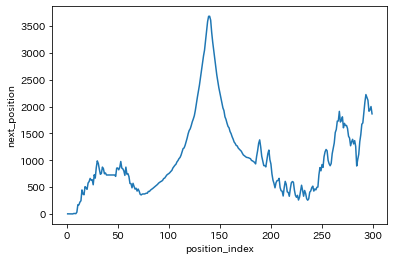

In [6]:
# 問題3
alpha = 0.2
next_position = y[:-1] - (alpha * gradient)
plt.plot(x[1:], next_position)
print(next_position)
plt.xlabel('position_index')
plt.ylabel('next_position')
plt.show()